<H2>Model complexity and Graid Search</H2>

Too much training can lead to overfitting : the model will perform well on the training dataset but poorly on the test and validation dataset. So there is a sweetspot where we have to stop the training of the model.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [24]:
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
# create a toy dataset
x = np.linspace(-3,3,100)
rng = np.random.RandomState(42)
#print(x)
#sinusoidal function with some normal random noise
y = np.sin(4*x) + x + rng.normal(size=(len(x)))
# this two next lines are equivalent
X = x[:, np.newaxis]
X = x.reshape(len(x), 1)

cv = KFold(n=len(x), shuffle=True)

for n_neighbors in [1,3,5,10,20]:
    print(KNeighborsRegressor(n_neighbors=n_neighbors).get_params().keys())
    scores = cross_val_score(KNeighborsRegressor(n_neighbors=n_neighbors), X, y, cv=cv)
    print("n_neighbors: %d, average score: %f" % (n_neighbors, np.mean(scores)))

dict_keys(['n_neighbors', 'metric', 'p', 'leaf_size', 'algorithm', 'weights', 'metric_params', 'n_jobs'])
n_neighbors: 1, average score: 0.579472
dict_keys(['n_neighbors', 'metric', 'p', 'leaf_size', 'algorithm', 'weights', 'metric_params', 'n_jobs'])
n_neighbors: 3, average score: 0.709425
dict_keys(['n_neighbors', 'metric', 'p', 'leaf_size', 'algorithm', 'weights', 'metric_params', 'n_jobs'])
n_neighbors: 5, average score: 0.732916
dict_keys(['n_neighbors', 'metric', 'p', 'leaf_size', 'algorithm', 'weights', 'metric_params', 'n_jobs'])
n_neighbors: 10, average score: 0.671591
dict_keys(['n_neighbors', 'metric', 'p', 'leaf_size', 'algorithm', 'weights', 'metric_params', 'n_jobs'])
n_neighbors: 20, average score: 0.546276


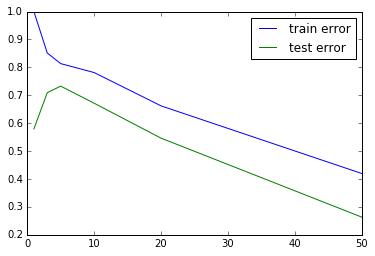

In [28]:
from sklearn.learning_curve import validation_curve
n_neighbors = [1,3,5,10,20, 50]
train_errors, test_errors = validation_curve(KNeighborsRegressor(), X, y, param_name='n_neighbors', param_range=n_neighbors, cv=cv )

plt.plot(n_neighbors, train_errors.mean(axis=1), label="train error")
plt.plot(n_neighbors, test_errors.mean(axis=1), label="test error")
plt.legend(loc='best')